<a href="https://colab.research.google.com/github/Nishat-Tasnim-33/Tensorflow_fundamentals_Basic/blob/main/tensorflow_fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Creating tensorswith tf.constant()
import tensorflow as tf
scalar =tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:

# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# creating a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
#checking the dimensionof our vector
vector.ndim

1

In [ ]:
from numpy.matrixlib.defmatrix import matrix
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10,20],
                      [20,30]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 20],
       [20, 30]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:

# Create another matrix and define the datatype
another_matrix = tf.constant([[10.,20.],
                            [30.,40.],
                            [50.,60.]],dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10., 20.],
       [30., 40.],
       [50., 60.]], dtype=float16)>

In [ ]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim


2

In [ ]:

# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                     [[13,14,15],
                      [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

#**Creating Tensors with tf.Variable()**

#####You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using tf.Variable().The difference between tf.Variable() and tf.constant() is tensors created with tf.constant() are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with tf.Variable() are mutable (can be changed).

In [ ]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor


(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [ ]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangleable_tensor

AttributeError: ignored

## **Creating random tensors**
Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors?

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).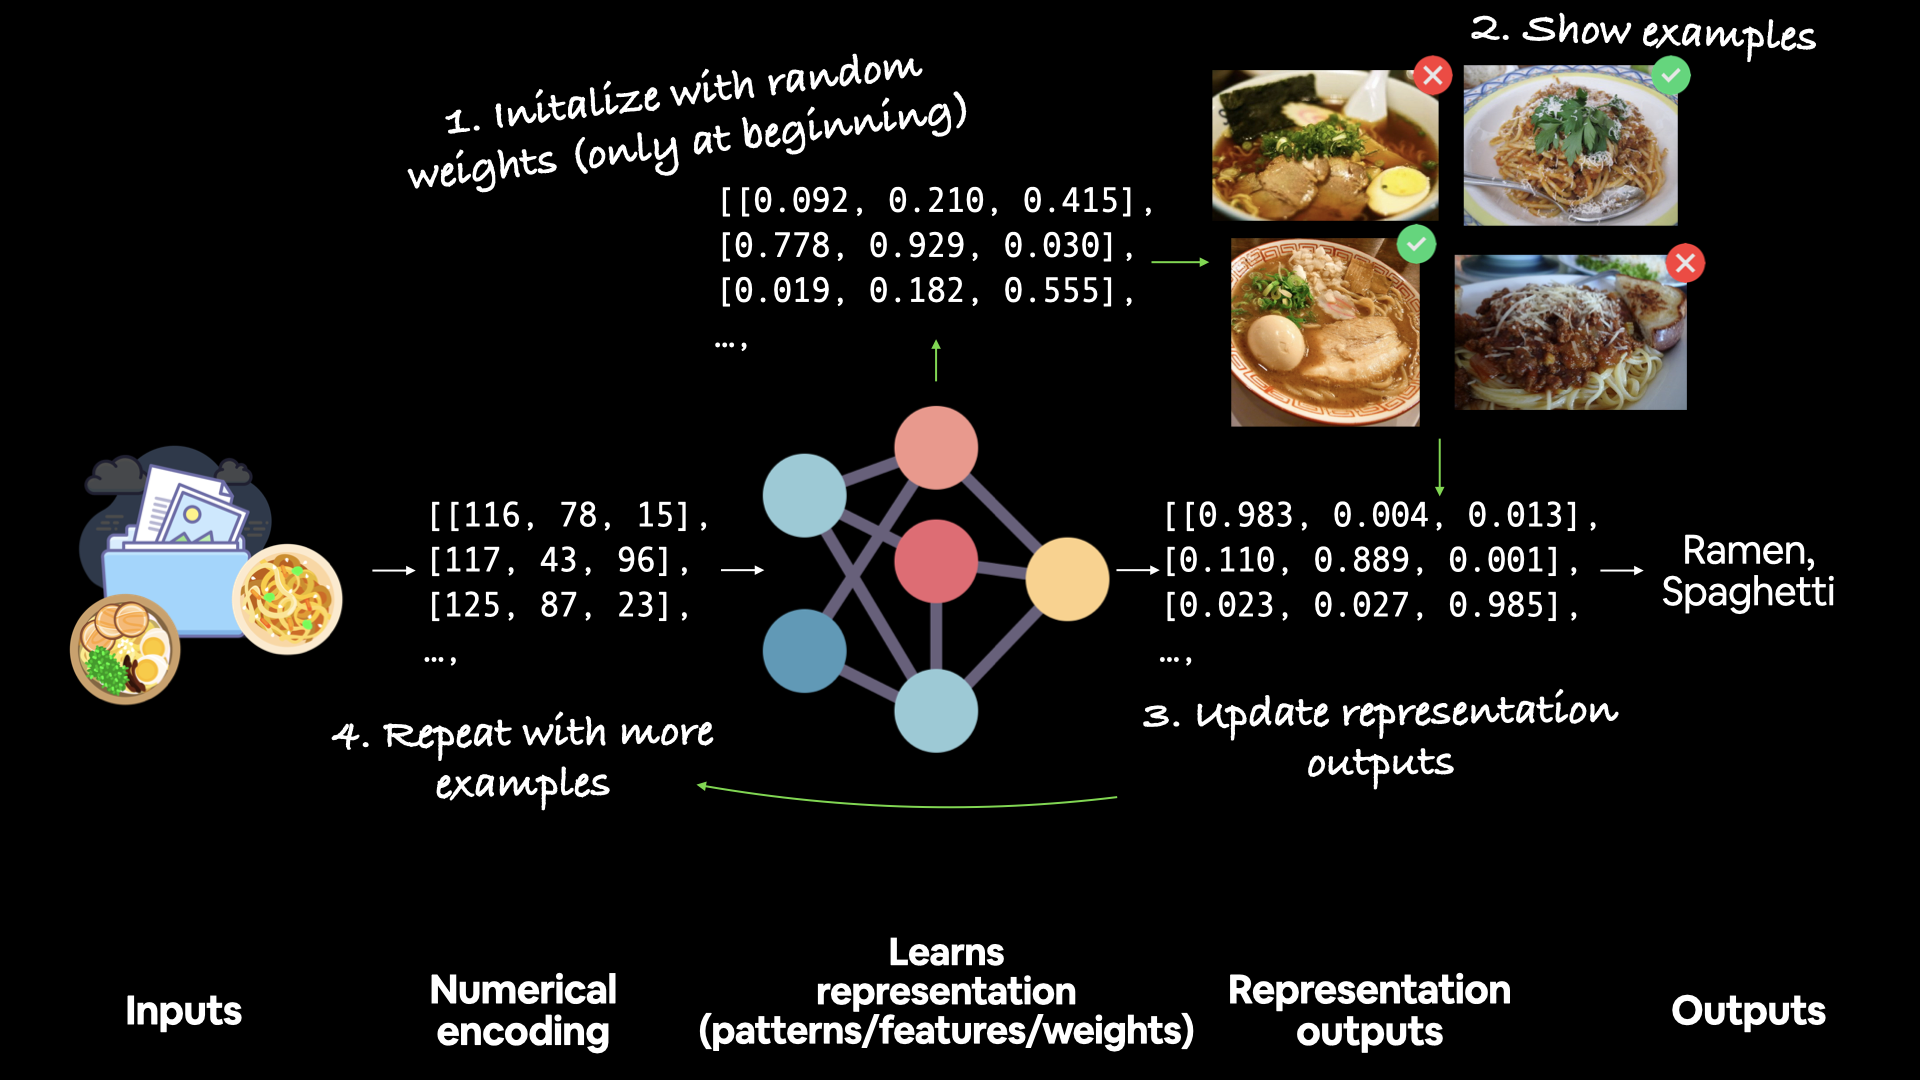

A network learns by starting with random patterns (1) then going through demonstrative examples of data (2) whilst trying to update its random patterns to represent the examples (3).

We can create random tensors by using the tf.random.Generator class.


In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)# set the seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_1,random_2,random_1==random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

In [ ]:
# Create two random (and different) tensors
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3,2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3,2))
# Check the tensors and see if they are equal
random_3, random_4, random_1 == random_3, random_3 == random_4

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.27305737, -0.29925638],
        [-0.3652325 ,  0.61883307],
        [-1.0130816 ,  0.28291714]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)


What if you wanted to shuffle the order of a tensor?

Wait, why would you want to do that?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.







In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10,7],
                            [3,4],
                            [2,5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:

# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

It's due to rule #4 of the tf.random.set_seed() documentation.

"4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

tf.random.set_seed(42) sets the global seed, and the seed parameter in tf.random.shuffle(seed=42) sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."






In [ ]:

# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)
# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
#set the global random seed
tf.random.set_seed(42)#if you comment this out you'll get different output

# Set the operation random seed
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

Here we can able to see when we set the global seed the the operation remains same but when we remove the cell of global seed then we can able to see shuffled in the matrix.

## **Other ways to make tensors**
Though you might rarely use these (remember, many tensor operations are done behind the scenes for you), you can use tf.ones() to create a tensor of all ones and tf.zeros() to create a tensor of all zeros.

In [ ]:
#Create a tensor of all ones
tf.ones([5,7])

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
#Create a tensor of all zeroes
tf.zeros([3,4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

# **You can also turn NumPy arrays in into tensors.**

Remember, the main difference between tensors and NumPy arrays is that tensors can be run on GPUs.

🔑 Note: A matrix or tensor is typically represented by a capital letter (e.g. X or A) where as a vector is typically represented by a lowercase letter (e.g. y or b).

In [ ]:
# we can also turn Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:


A = tf.constant(numpy_A,shape=(3,8))
B = tf.constant(numpy_A)
A,B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

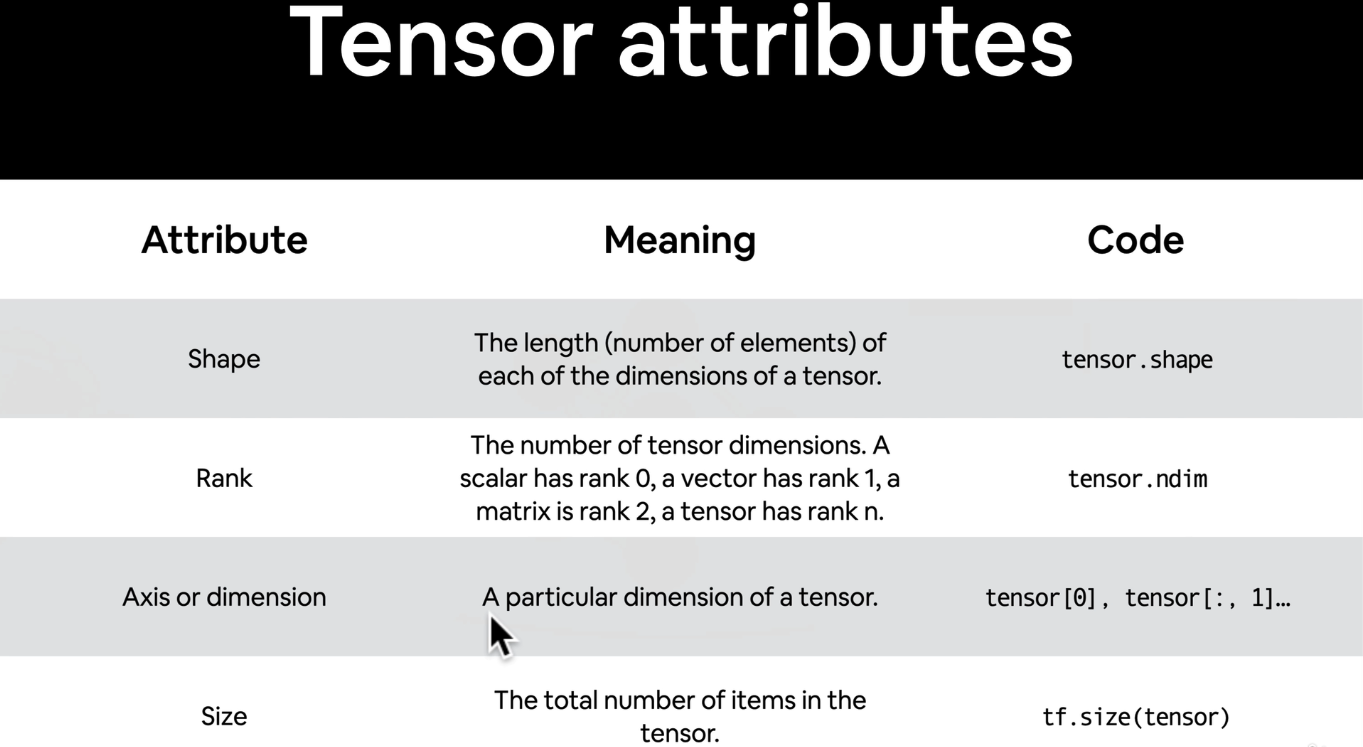

# **Getting information from tensors (shape, rank, size)**

There will be times when you'll want to get different pieces of information from your tensors, in particuluar, you should know the following tensor vocabulary:

**Shape:** The length (number of elements) of each of the dimensions of a tensor.

**Rank:** The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.

**Axis or Dimension:** A particular dimension of a tensor.

**Size:**The total number of items in the tensor.
You'll use these especially when you're trying to line up the shapes of your data to the shapes of your model. For example, making sure the shape of your image tensors are the same shape as your models input layer.

We've already seen one of these before using the ndim attribute. Let's see the rest.

In [ ]:
#Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor))
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array


Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): tf.Tensor(120, shape=(), dtype=int32)
Total number of elements (2*3*4*5): 120


# We can also index tensors just like python list

---



In [ ]:
# Get the first 2 items of each dimention
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:

# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],[7,6]])
rank_2_tensor


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7,  6]], dtype=int32)>

In [ ]:
# Get the last item of each row
rank_2_tensor[:,-1]


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 6], dtype=int32)>

# We can also add dimensions to your tensor whilst keeping the same information present using tf.newaxis.

In [ ]:
# Add an extra dimension (to the end)
rank_3_tensor = rank_2_tensor[...,tf.newaxis] # in Python "..." means "all dimensions prior to"
rank_2_tensor,rank_3_tensor # shape(2,2) & shape (2,2,1)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 7,  6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 7],
         [ 6]]], dtype=int32)>)

# **You can achieve the same using**
tf.expand_dims()

In [ ]:

tf.expand_dims(rank_2_tensor,axis = -1) #"-1" means last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 7],
        [ 6]]], dtype=int32)>

# **Manipulating tensors (tensor operations)**
Finding patterns in tensors (numberical representation of data) requires manipulating them.

Again, when building models in TensorFlow, much of this pattern discovery is done for us.

# **Basic operations**

We can perform many of the basic mathematical operations directly on tensors using Pyhton operators such as, +, -, *.

In [ ]:
# We can add values to a tensor using the addition operator
tensor = tf.constant([[10,7],[3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

## Since we used tf.constant(), the original tensor is unchanged (the addition gets done on a copy).

In [ ]:
#unchanged one
tensor

In [ ]:

# Multiplication (known as element-wise multiplication)
tensor,tensor*10

In [ ]:
#Subtraction
tensor-10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

# **We  can also use the equivalent TensorFlow function. Using the TensorFlow function (where possible) has the advantage of being sped up later down the line when running as part of a TensorFlow graph.**

In [ ]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

# **Matrix mutliplication**
One of the most common operations in machine learning algorithms is matrix multiplication.

TensorFlow implements this matrix multiplication functionality in the tf.matmul() method.

The main two rules for matrix multiplication to remember are:

1. if there are 2 **nXm** matrix the value **m** 1st matrix have to be matched with the 2nd matrix's **n**
2. The out of matrix have to be combine **nXm** of both matrix

In [ ]:

#Matrix multiplication in tensor
print(tensor)
tf.matmul(tensor,tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:

# Matrix multiplication with Python operator '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:

#Here we are creatting new tenson
x = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
x,y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# we'll see error here
x @ y

InvalidArgumentError: ignored

Trying to matrix multiply two tensors with the shape (3, 2) errors because the inner dimensions don't match.

We need to either:

Reshape X to (2, 3) so it's (2, 3) @ (3, 2).

Reshape Y to (3, 2) so it's (3, 2) @ (2, 3).

We can do this with either:

tf.reshape() - allows us to reshape a tensor into a defined shape.
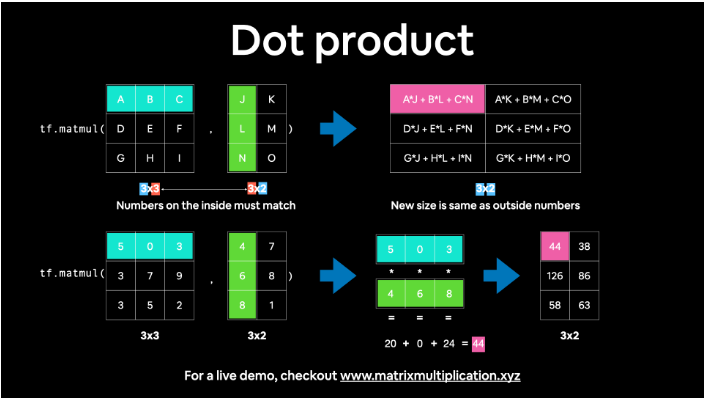

In [ ]:
# Example of reshape (3, 2) -> (2, 3)
print(y)
print("\n\n")
tf.reshape(y,shape=(2,3))

In [ ]:
# Try matrix multiplication with reshaped Y
print(x,"\n\n")
print(tf.reshape(y,shape=(2,3)),"\n\n")
x @ tf.reshape(y,shape=(2,3))

# It worked, let's try the same with a reshaped X, except this time we'll use tf.transpose() and tf.matmul().

In [ ]:
#Example of Transpose (3,2) -> (2,3)
print(x,"\n\n")
print("New transpose x is below:-\n\n")
tf.transpose(x)

In [ ]:
# Try matrix multiplication
tf.matmul(tf.transpose(x),y)

In [ ]:
tf.transpose(x) @ y

In [ ]:







# We can achieve the same result with parameters
tf.matmul(a=x,b=y,transpose_a= True, transpose_b= False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

# **The dot product**
Multiplying matrices by eachother is also referred to as the dot product.

You can perform the tf.matmul() operation using tf.tensordot().

In [ ]:
# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(x),y,axes =1)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(x, tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:






# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(x,tf.reshape(y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Hmm... they result in different values.

Which is strange because when dealing with Y (a (3x2) matrix), reshaping to (2, 3) and tranposing it result in the same shape.

In [ ]:
# Check shapes of Y, reshaped Y and tranposed Y
y.shape , tf.reshape(y,(2,3)).shape, tf.transpose(y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

In [ ]:
# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)



# **Changing the datatype of a tensor**

Sometimes we'll want to alter the default datatype of our tensor.

This is common when we want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers).

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

We can change the datatype of a tensor using tf.cast().

In [ ]:

# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>)

In [ ]:

# Change from float32 to float16 (reduced precision)
B = tf.cast(B,dtype=tf.float16)
B

In [ ]:
C = tf.cast(C,dtype=tf.float32)
C

# **Getting the absolute value**
Sometimes you'll want the absolute values (all values are positive) of elements in your tensors.

To do so, you can use tf.abs().

In [ ]:
# Create tensor with negative values
d = tf.constant([-7,-11])
d

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -11], dtype=int32)>

In [ ]:
# Get the absolute values
tf.abs(d)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 11], dtype=int32)>

In [ ]:
d = tf.abs(d)
print(d)

tf.Tensor([ 7 11], shape=(2,), dtype=int32)


# **Finding the min, max, mean, sum (aggregation)**
We can quickly aggregate (perform a calculation on a whole tensor) tensors to find things like the minimum value, maximum value, mean and sum of all the elements.

To do so, aggregation methods typically have the syntax reduce()_[action], such as:

tf.reduce_min() - find the minimum value in a tensor.

tf.reduce_max() - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).

tf.reduce_mean() - find the mean of all elements in a tensor.

tf.reduce_sum() - find the sum of all elements in a tensor.

Note: typically, each of these is under the math module, e.g. tf.math.reduce_min() but we can use the alias tf.reduce_min().

Let's see them in action.

In [ ]:

# Create a tensor with 50 random values between 0 and 100
e = tf.constant(np.random.randint(low=0,high=100,size=50))
e

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([18, 38, 12, 25, 87, 90, 19, 37, 18, 46, 70,  6, 17, 24, 42, 59, 34,
       61,  5, 43,  5, 43, 13, 23, 22, 73, 23, 38, 41, 75,  3, 61, 58,  7,
        4, 80, 54, 70,  8, 92, 26, 66, 26, 87, 51,  3, 58, 75, 69, 58])>

In [ ]:

# Find the minimum
tf.reduce_min(e)


<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [ ]:
#find the max value
tf.reduce_max(e).numpy()

92

In [ ]:
#find the mean value
tf.reduce_mean(e).numpy()

In [ ]:
# Find the sum
tf.reduce_sum(e).numpy()

2063

# **Finding the positional maximum and minimum**
tf.argmax() - find the position of the maximum element in a given tensor.

tf.argmin() - find the position of the minimum element in a given tensor.

In [ ]:
f = tf.constant(np.random.random(50))
f

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.23197578, 0.4455242 , 0.77382668, 0.52741941, 0.0886242 ,
       0.49947244, 0.75076392, 0.02859667, 0.90511969, 0.24617862,
       0.7634871 , 0.07072435, 0.71722995, 0.49076189, 0.07433744,
       0.38804172, 0.12940496, 0.90782436, 0.86503962, 0.95362159,
       0.73995064, 0.97894978, 0.3213709 , 0.27291489, 0.37338932,
       0.10849792, 0.45841257, 0.03205654, 0.68938741, 0.56244748,
       0.92086137, 0.47980631, 0.02354236, 0.35982655, 0.4972475 ,
       0.89959493, 0.87335476, 0.7641296 , 0.10844795, 0.44818409,
       0.71311922, 0.9478118 , 0.09586917, 0.16062555, 0.39070293,
       0.92757967, 0.73841753, 0.69463274, 0.87516769, 0.22025508])>

In [ ]:

# Find the maximum element position of F
tf.argmax(f)

<tf.Tensor: shape=(), dtype=int64, numpy=21>

In [ ]:

# Find the minimum element position of F
tf.argmin(f)

<tf.Tensor: shape=(), dtype=int64, numpy=32>

In [ ]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(f).numpy()}")
print(f"The maximum value of F is: {tf.reduce_max(f).numpy()}")
print(f"Using tf.argmax() to index F, the maximum value of F is: {f[tf.argmax(f)].numpy()}")
print(f"Are the two max values the same (they should be)? {f[tf.argmax(f)].numpy() == tf.reduce_max(f).numpy()}")

The maximum value of F is at position: 21
The maximum value of F is: 0.9789497773179828
Using tf.argmax() to index F, the maximum value of F is: 0.9789497773179828
Are the two max values the same (they should be)? True


# **Squeezing a tensor (removing all single dimensions)**
 you need to remove single-dimensions from a tensor (dimensions with size 1), you can use tf.squeeze().

tf.squeeze() - remove all dimensions of 1 from a tensor.


In [ ]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
tf.random.set_seed(42)
k = tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
k

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
k.shape,k.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [ ]:
# Squeeze tensor G (remove all 1 dimensions)
k_sq = tf.squeeze(k)
print(k_sq,"\n\n")
k_sq.shape, k_sq.ndim

tf.Tensor(
[0.6645621  0.44100678 0.3528825  0.46448255 0.03366041 0.68467236
 0.74011743 0.8724445  0.22632635 0.22319686 0.3103881  0.7223358
 0.13318717 0.5480639  0.5746088  0.8996835  0.00946367 0.5212307
 0.6345445  0.1993283  0.72942245 0.54583454 0.10756552 0.6767061
 0.6602763  0.33695042 0.60141766 0.21062577 0.8527372  0.44062173
 0.9485276  0.23752594 0.81179297 0.5263394  0.494308   0.21612847
 0.8457197  0.8718841  0.3083862  0.6868038  0.23764038 0.7817228
 0.9671384  0.06870162 0.79873943 0.66028714 0.5871513  0.16461694
 0.7381023  0.32054043], shape=(50,), dtype=float32) 




(TensorShape([50]), 1)

# **One-hot encoding**

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

Have a tensor of indicies and would like to one-hot encode it, you can use tf.one_hot().

We should also specify the depth parameter (the level which you want to one-hot encode to).

In [ ]:
#create a list of indices
some_list = [0,1,2,3]

# One hot encode them
tf.one_hot(some_list,depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:

# Specify custom values for on and off encoding, we can also specify values for on_value and off_value instead of the default 0 and 1.
tf.one_hot(some_list , depth=4, on_value= "Strong", off_value = "Weak")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Strong', b'Weak', b'Weak', b'Weak'],
       [b'Weak', b'Strong', b'Weak', b'Weak'],
       [b'Weak', b'Weak', b'Strong', b'Weak'],
       [b'Weak', b'Weak', b'Weak', b'Strong']], dtype=object)>

# **Squaring, log, square root**
Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:

tf.square() - get the square of every value in a tensor.

tf.sqrt() - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error).

tf.math.log() - get the natural log of every value in a tensor (elements need to floats).

In [ ]:
# Create a new tensor
h = tf.constant(np.arange(1,11))
h

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])>

In [ ]:
#Square it
tf.square(h)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])>

In [ ]:

# Find the squareroot (will error), needs to be non-integer
tf.sqrt(h)

InvalidArgumentError: ignored

In [ ]:

# Change H to float32
tf.sqrt(tf.cast(h,dtype=tf.float32))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       , 3.1622777], dtype=float32)>

In [ ]:
# Find the log (input also needs to be float)
tf.math.log(h)

InvalidArgumentError: ignored

In [ ]:
tf.math.log(tf.cast(h,dtype=tf.float32))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246, 2.3025851], dtype=float32)>

# **Manipulating tf.Variable tensors**
Tensors created with tf.Variable() can be changed in place using methods such as:

.assign() - assign a different value to a particular index of a variable tensor.

.add_assign() - add to an existing value and reassign it at a particular index of a variable tensor.

In [ ]:

# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [ ]:
# Assign the final value a new value of 50
I.assign([1,2,3,4,50])
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 1,  2,  3,  4, 50])>

In [ ]:
# The change happens in place (the last value is now 50, not 4)
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 1,  2,  3,  4, 50])>

# **Tensors and NumPy**

We've seen some examples of tensors interact with NumPy arrays, such as, using NumPy arrays to create tensors.

Tensors can also be converted to NumPy arrays using:

np.array() - pass a tensor to convert to an ndarray (NumPy's main datatype).

tensor.numpy() - call on a tensor to convert to an ndarray.

Doing this is helpful as it makes tensors iterable as well as allows us to use any of NumPy's methods on them.

In [ ]:
#Create a tensor form a NumPy array
J = tf.constant(np.array([3.,7.,10]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:

# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

# **Finding access to GPUs**

We've mentioned GPUs plenty of times throughout this notebook.

So how do you check if you've got one available?

You can check if you've got access to a GPU using tf.config.list_physical_devices().


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]
